## Table of Contents

* [Scenario](#chapter1)
* [About the project](#chapter2)

* [1.Data Inspection](#chapter3)
    * [1.1 Data Understanding](#section_3_1)
    * [1.2 Checking the data types](#section_3_2)
    * [1.3 Checking the missing values](#section_3_3)
    
* [2.Exploratory Data Analysis](#chapter4)
    * [1.Confirmed cases throught the world](#section_4_1)
    * [2.Which countries outside of China have been hit hardest?](#section_4_2)
    * [3.How is  the situation in china compared to the rest of the world](#section_4_3)
    * [4.Events that marked the covid-19 situation](#section_4_4)
    * [5.How Fast is the number of cases growing in China ? : Adding  a trendline](#section_4_5)
    * [6.How Fast is the number of cases growing in the rest of the world ](#section_4_6)

## 👀 Scenario <a class="anchor" id="chapter1">
In December 2019, COVID-19 coronavirus was first identified in the Wuhan region of China. By March 11, 2020, the World Health Organization (WHO) categorized the COVID-19 outbreak as a pandemic. A lot has happened in the months in between with major outbreaks in Iran, South Korea, and Italy.  We know that COVID-19 spreads through respiratory droplets, such as through coughing, sneezing, or speaking. But, how quickly did the virus spread across the globe? And, can we see any effect from country-wide policies, like shutdowns and quarantines?

## ❓  About the project <a class="anchor" id="chapter2">
The objective of this project is to visualize covid-19 data from the first several weeks of the outbreak to see at what point this virus became a global pandemic.we are going to analyze three datasets :
    
  -  The first dataset includes the confirmed covid cases by date. we will be using this dataset to look at the evolution
    of covid-19 cases and see at what point this virus became a global pandemic.Besides to that , we will analyze the events that happened during the covid-19 outbreak and their impact on covid-19 cases.
    
  - The second dataset includes data about covid-19 cases in China , we will be using this dataset to analyze how the spread of the virus throught the world is compared to china.
    
  - The third dataset includes the confirmed covid cases by date and country , we will use this dataset to analyze which countries have been hit the most by the global pandemic.

## 🔎 1. Data Inspection <a class="anchor" id="chapter3">

In [54]:
options(repr.plot.width=6, repr.plot.height=4)
# laoding the libraries 
library(readr)
library(ggplot2)
library(dplyr)
library(data.table)
# Loading the data 
confirmed_cases_worldwide <- read_csv('C:/Users/Atolb/Downloads/confirmed_cases_worldwide.csv')


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  date = col_date(format = ""),
  cum_cases = col_double()
)




#### 1. Data Understanding <a class="anchor" id="section_3_1">

In [2]:
## getting a glimpse about the data 
glimpse(confirmed_cases_worldwide)

Rows: 56
Columns: 2
$ date      <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26,~
$ cum_cases <dbl> 555, 653, 941, 1434, 2118, 2927, 5578, 6166, 8234, 9927, 120~


 <div align="center">

| Variable              | Description                                                                                   |
|:----------------------|:----------------------------------------------------------------------------------------------|
| date            |  The date in which the covid-cases were registered.  |
| cum_cases                | The total number of covid-19 cases.              |

#### 2. Checking the data types <a class="anchor" id="section_3_2">
it is crucial to check that we have the correct data types before moving on with analysis.

In [3]:
sapply(confirmed_cases_worldwide,typeof)

date cum_cases 
 "double"  "double"

As we can see , the date column has an incorrect data type , let's fix this problem.

In [4]:
confirmed_cases_worldwide$date <- as.Date(confirmed_cases_worldwide$date)

In [5]:
str(confirmed_cases_worldwide)

spec_tbl_df[,2] [56 x 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date     : Date[1:56], format: "2020-01-22" "2020-01-23" ...
 $ cum_cases: num [1:56] 555 653 941 1434 2118 ...
 - attr(*, "spec")=
  .. cols(
  ..   date = col_date(format = ""),
  ..   cum_cases = col_double()
  .. )


#### 3. Checking the missing values <a class="anchor" id="section_3_3">

In [6]:
sapply(confirmed_cases_worldwide, function(x) sum(is.na(x)))

date cum_cases 
        0         0

fortunately ,we have no missing values ;) 
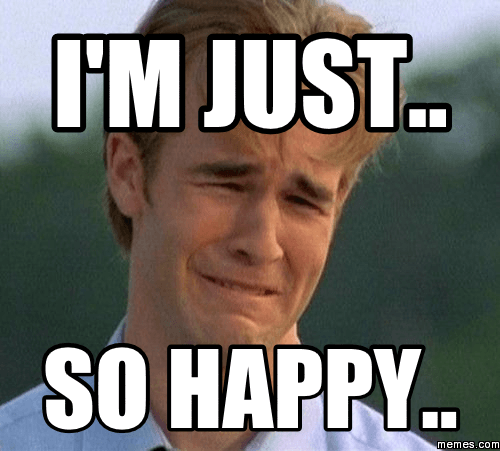

## ⚙️ 2. Exploratory Data Analysis <a class="anchor" id="chapter4">

#### 1.Confirmed cases throught the world <a class="anchor" id="section_4_1">

In [7]:
head(confirmed_cases_worldwide)

date,cum_cases
2020-01-22,555
2020-01-23,653
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
2020-01-27,2927


Let's draw a line plot of cumulative cases vs. date

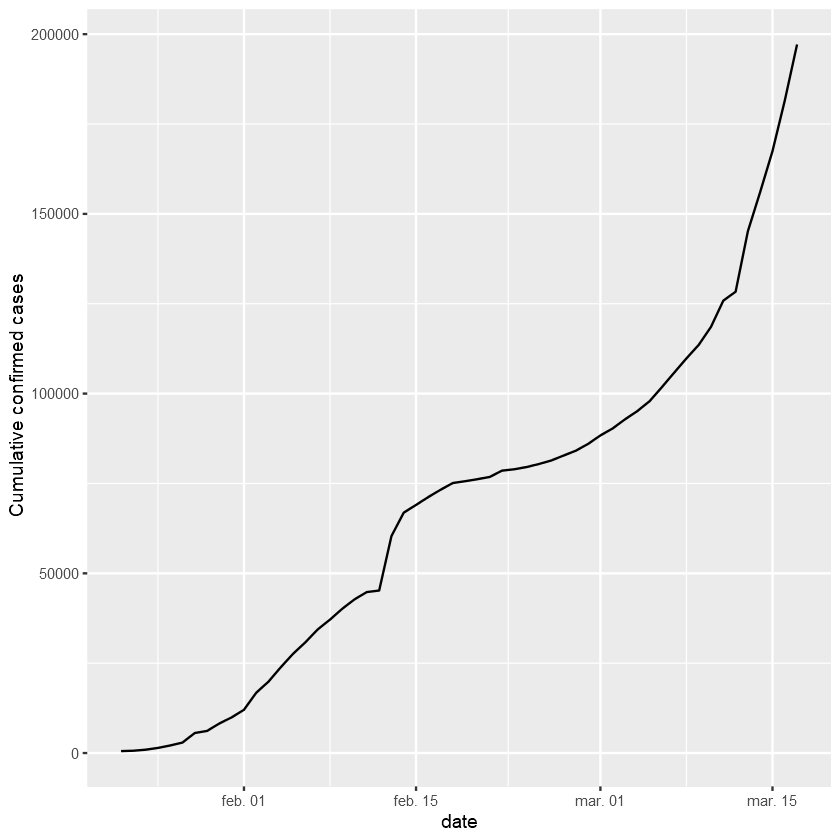

In [8]:
ggplot(confirmed_cases_worldwide,aes(x=date,y=cum_cases)) +
  geom_line() +
  ylab('Cumulative confirmed cases')

###### As we can see the total number of confirmed cases is approaching 200,000.Beyond that , we also see that there is an odd jump in mid february , then the rate of new cases slows down for a while , then speeds up again in March. We will dig deeper to see what is happening.

#### 2.Which countries outside of China have been hit hardest?  <a class="anchor" id="section_4_2">

In [10]:
# Run this to get the data for each country
confirmed_cases_by_country <- read_csv('C:/Users/Atolb/Downloads/confirmed_cases_by_country.csv')
str(confirmed_cases_by_country)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  country = col_character(),
  province = col_character(),
  date = col_date(format = ""),
  cases = col_double(),
  cum_cases = col_double()
)




spec_tbl_df[,5] [13,272 x 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ country  : chr [1:13272] "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ province : chr [1:13272] NA NA NA NA ...
 $ date     : Date[1:13272], format: "2020-01-22" "2020-01-22" ...
 $ cases    : num [1:13272] 0 0 0 0 0 0 0 0 0 0 ...
 $ cum_cases: num [1:13272] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   country = col_character(),
  ..   province = col_character(),
  ..   date = col_date(format = ""),
  ..   cases = col_double(),
  ..   cum_cases = col_double()
  .. )


In [14]:
# selecting the columns we are interested in 
total_cases_by_country <- confirmed_cases_by_country %>%
select(country,date,cum_cases) 

In [27]:
# Group by country, summarize to calculate total cases, find the top 5
top_countries_by_total_cases <- total_cases_by_country %>%
  group_by(country) %>%
  summarize(total_cases = max(cum_cases)) %>%
  top_n(5)
top_countries_by_total_cases

Selecting by total_cases



country,total_cases
Germany,9257
Iran,16169
Italy,31506
"Korea, South",8320
Spain,11748


In [28]:
top5_countries <- total_cases_by_country[country %in% c("Germany","Iran","Italy","Korea, South","Spain")]

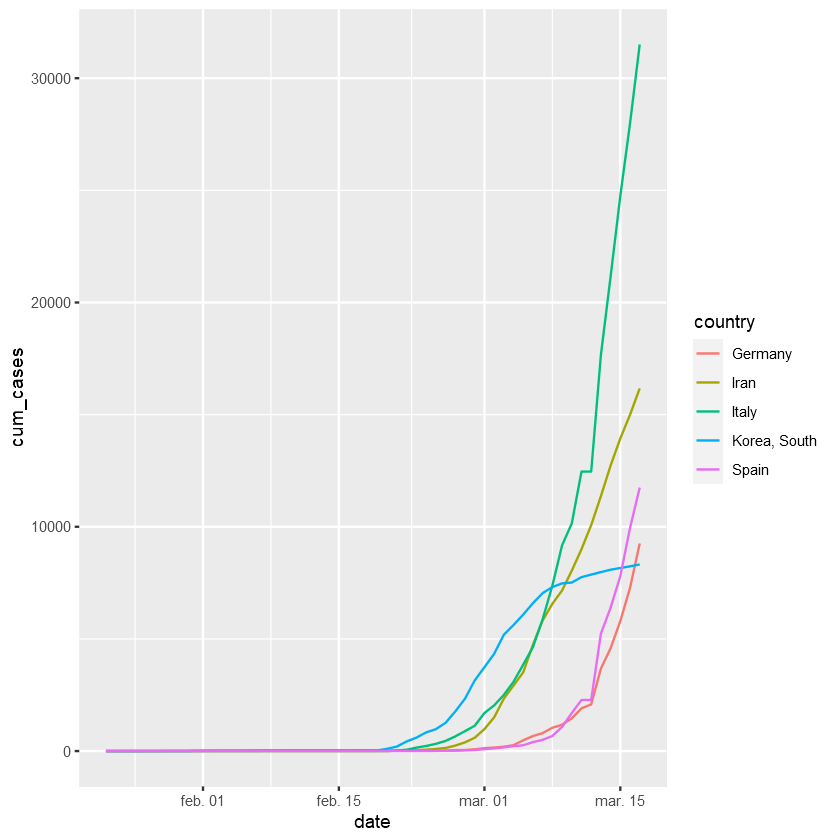

In [29]:
# visualizing hardest hit countries as of Mid-March 2020
ggplot(top5_countries) + 
aes(x=date,y=cum_cases,color=country) + 
geom_line()

##### Even though the outbreak was first identified in China, there is only one country from East Asia (South Korea). The rest of the countries are in Europe and share borders.

#### 3.How is  the situation in china compared to the rest of the world?  <a class="anchor" id="section_4_3">
Early on in the outbreak, the COVID-19 cases were primarily centered in China. Let's plot confirmed COVID-19 cases in China and the rest of the world separately to see if it gives us any insight.

In [30]:
# Read in datasets/confirmed_cases_china_vs_world.csv
confirmed_cases_china_vs_world <- read_csv('C:/Users/Atolb/Downloads/confirmed_cases_china_vs_world.csv')
head(confirmed_cases_china_vs_world,3)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  is_china = col_character(),
  date = col_date(format = ""),
  cases = col_double(),
  cum_cases = col_double()
)




is_china,date,cases,cum_cases
China,2020-01-22,548,548
China,2020-01-23,95,643
China,2020-01-24,277,920


let's draw a plot that shows us the situation in china versus the rest of the world.

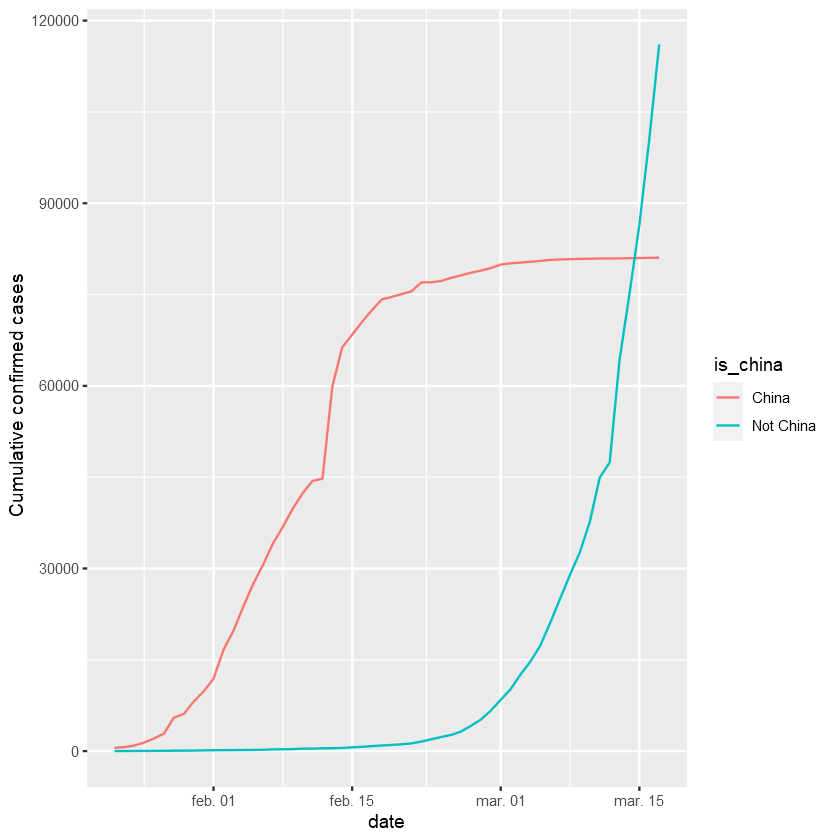

In [31]:
 ggplot(confirmed_cases_china_vs_world) +
  geom_line(aes(x=date,y=cum_cases,color=is_china)) +
  ylab("Cumulative confirmed cases")

##### As we can see from the plot , in February the majority of cases were in China. This situation has changed in March when it really became  a global outbreak. Around March 14,the total number of cases outside China overtook the number of cases inside China. This happened days after the World Health Organization (WHO) declared a pandemic.

Let's look at some events that happened during the outbreak. 

#### 4.Events that marked the covid-19 situation ?  <a class="anchor" id="section_4_4">

##### Events that happened during the outbreak : 
   *  On 30th of January , Global health emergency declared.
   * On the 11th of March , Pandemic declared. 
   * On the 13th of february , China reporting change.

In [40]:
events <- tribble(
  ~ date, ~ event,
  "2020-01-30", "Global health emergency declared",
  "2020-03-11", "Pandemic declared",
  "2020-02-13", "China reporting change"
) %>%
  mutate(date = as.Date(date))

Let's plot these events and see how they marked the covid-19 situation.

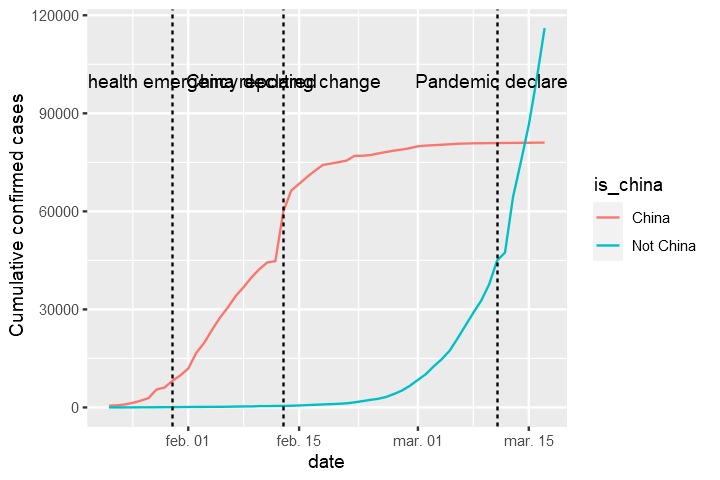

In [55]:
ggplot(confirmed_cases_china_vs_world) +
  geom_line(aes(x=date,y=cum_cases,color=is_china)) +
  ylab("Cumulative confirmed cases") + 
geom_vline(aes(xintercept=date),data=events,linetype="dashed") + 
geom_text(aes(date,label=event),data=events,y=1e5)

##### As we can see , there is a clear surge of cases around February 13, 2020, with the reporting change in China.However, a couple of days after, the growth of cases in China slows down

#### 5.How Fast is the number of cases growing in China ? : Adding  a trendline <a class="anchor" id="section_4_5">

`geom_smooth()` using formula 'y ~ x'



$y
[1] "Cumulative confirmed cases"

attr(,"class")
[1] "labels"

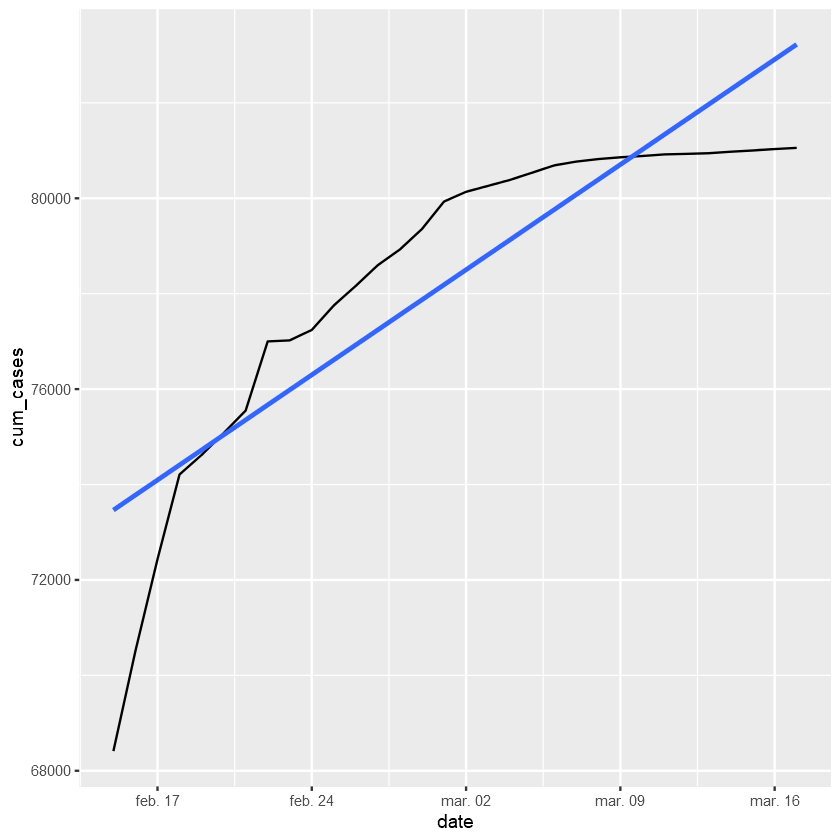

In [51]:
# Filter for China, from Feb 15
china_after_feb15 <- confirmed_cases_china_vs_world %>%
   filter(is_china=="China", date >= "2020-02-15")

ggplot(data=china_after_feb15,aes(x=date,y=cum_cases)) +
  geom_line () +
  geom_smooth(method='lm',se=FALSE)
  ylab("Cumulative confirmed cases")

##### As we can see from the plot above , the growth rate in china is slower than linear which indicates that China has somewhat contained the virus in late february and early March. Is the situation the same for the rest of the world ? Let's see ;)

#### 6.How Fast is the number of cases growing in the rest of the world ? : Adding  a trendline <a class="anchor" id="section_4_6">

`geom_smooth()` using formula 'y ~ x'



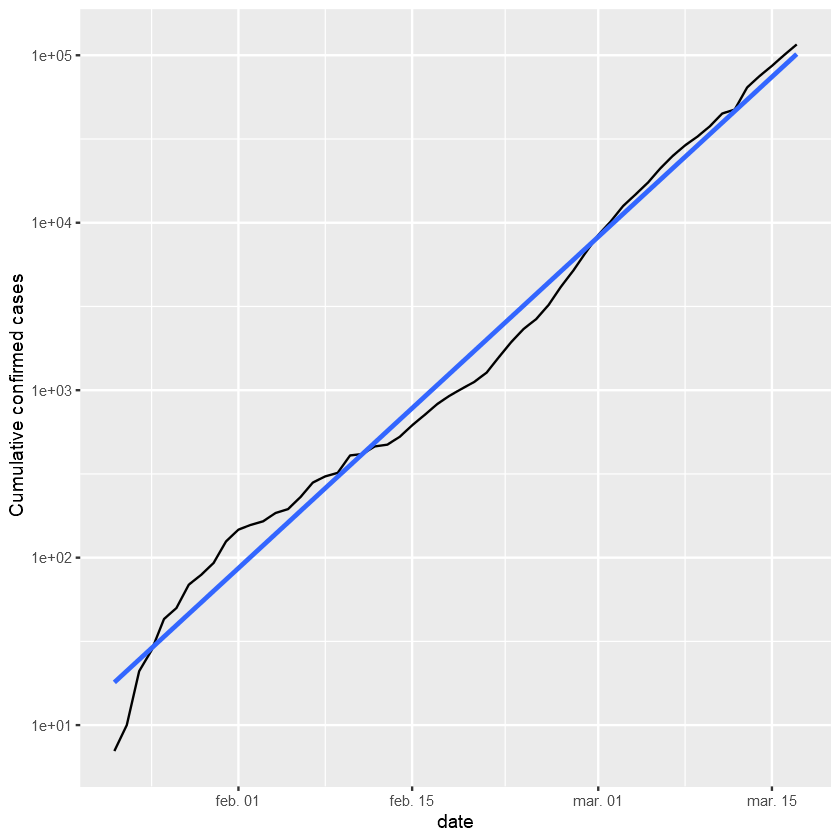

In [53]:
not_china <- confirmed_cases_china_vs_world %>%
   filter(is_china=="Not China")
plt_not_china_trend_lin <- ggplot(not_china,aes(x=date,y=cum_cases)) +
  geom_line() +
  geom_smooth(method='lm',se=FALSE) +
  ylab("Cumulative confirmed cases")
plt_not_china_trend_lin + scale_y_log10()

##### It seems that the covid-19 cases are growing at an exponential rate , which is terrible news.